In [1]:
# Importing few libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Selection and Preprocessing

### Kaggle Dataset

In [2]:
# Displaying the first 5 rows and all the columns

df = pd.read_csv('hospital_readmissions.csv')
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [3]:
# Checking the shape or the Dataset i.e. rows,columns
df.shape

(25000, 17)

In [4]:
# Checking Datatypes
df.dtypes

age                  object
time_in_hospital      int64
n_lab_procedures      int64
n_procedures          int64
n_medications         int64
n_outpatient          int64
n_inpatient           int64
n_emergency           int64
medical_specialty    object
diag_1               object
diag_2               object
diag_3               object
glucose_test         object
A1Ctest              object
change               object
diabetes_med         object
readmitted           object
dtype: object

In [5]:
# Checking all the columns in the dataset
df.columns

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med', 'readmitted'],
      dtype='object')

In [6]:
#Checking in dataset for any null values
df.isnull().sum().sum()

0

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
# Encoding the categorical columns using label encoding
le=LabelEncoder()
df['age'] = le.fit_transform(df['age'])
df['medical_specialty'] = le.fit_transform(df['medical_specialty'])
df['diag_1'] = le.fit_transform(df['diag_1'])
df['diag_2'] = le.fit_transform(df['diag_2'])
df['diag_3'] = le.fit_transform(df['diag_3'])
df['glucose_test'] = le.fit_transform(df['glucose_test'])
df['A1Ctest'] = le.fit_transform(df['A1Ctest'])
df['change'] = le.fit_transform(df['change'])
df['diabetes_med'] = le.fit_transform(df['diabetes_med'])


In [9]:
# Mapping the target variable i.e. 1 for Yes and 0 for No
df['readmitted'] = df['readmitted'].map({'yes': 1, 'no': 0})

In [10]:
# Importing the Necessary library 
from sklearn.model_selection import train_test_split

In [11]:
# Splitting the dataset into training dataset(70%) and testing dataset(30%)
y = df['readmitted']
x = df.drop(columns = ['readmitted'])

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=10)

In [12]:
# Crosschecking the splitted dataset
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((17500, 16), (7500, 16), (17500,), (7500,))

In [13]:
# Importing the Necessary library 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix


In [14]:
# Model Building - Logistic Regression
lr = LogisticRegression()

model = lr.fit(xtrain,ytrain)
ytrain_pred = model.predict(xtrain)
ytest_pred =  model.predict(xtest)

print('Train',classification_report(ytrain,ytrain_pred))
print('Test',classification_report(ytest,ytest_pred))

Train               precision    recall  f1-score   support

           0       0.60      0.79      0.68      9247
           1       0.64      0.41      0.50      8253

    accuracy                           0.61     17500
   macro avg       0.62      0.60      0.59     17500
weighted avg       0.62      0.61      0.60     17500

Test               precision    recall  f1-score   support

           0       0.60      0.78      0.68      3999
           1       0.62      0.40      0.49      3501

    accuracy                           0.60      7500
   macro avg       0.61      0.59      0.58      7500
weighted avg       0.61      0.60      0.59      7500



C:\Users\gundg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression is often chosen for binary classification tasks due to its simplicity, interpretability, and effectiveness.
Here in this case we have either yes or no in the target variable, so using logistic regression makes a lot of sense.
It predicts the probability of occurance of a class label.

In [15]:
from xgboost import XGBClassifier

In [16]:
xgb = XGBClassifier()
xgb_model = xgb.fit(xtrain,ytrain)


print('Train',classification_report(ytrain,xgb_model.predict(xtrain)))
print('Test',classification_report(ytest,xgb_model.predict(xtest)))

Train               precision    recall  f1-score   support

           0       0.75      0.84      0.79      9247
           1       0.79      0.69      0.74      8253

    accuracy                           0.77     17500
   macro avg       0.77      0.77      0.77     17500
weighted avg       0.77      0.77      0.77     17500

Test               precision    recall  f1-score   support

           0       0.62      0.68      0.65      3999
           1       0.59      0.52      0.55      3501

    accuracy                           0.61      7500
   macro avg       0.60      0.60      0.60      7500
weighted avg       0.60      0.61      0.60      7500



Text(0.1, 0.8, '0.7655329243704925')

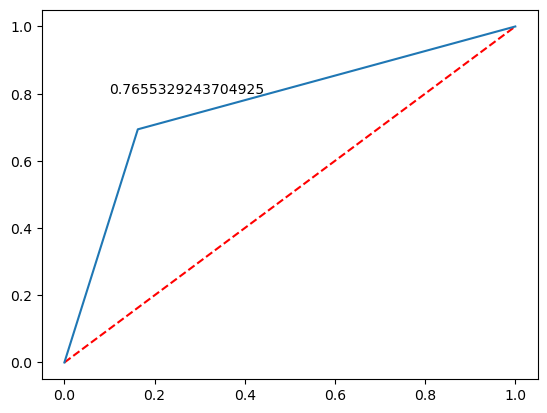

In [17]:
# Plotting ROC-AUC curve

pred_prob = xgb_model.predict_proba(xtrain)
fpr,tpr,threshold =roc_curve(ytrain,xgb_model.predict(xtrain))
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr)
plt.text(x=0.1,y=0.8,s=roc_auc_score(ytrain,xgb_model.predict(xtrain)))